<h1>EcoVolt</h1>

#  **Análise de Pegada de Carbono e Modelagem com Machine Learning**

## **Introdução**

Este projeto explora a **pegada de carbono (carbon footprint)** do Brasil em comparação com outras regiões, como o continente Americano, a OCDE e os EUA. Por meio de análises de dados e técnicas de Machine Learning, buscamos compreender fatores que influenciam as emissões de carbono, tendências históricas e a relação entre variáveis econômicas, energéticas e ambientais.

---

## **Objetivos**

- **Analisar a Pegada de Carbono do Brasil**:
  - Comparar emissões de carbono com outras regiões.
  - Identificar fontes principais de emissões no Brasil.
  
- **Explorar o Uso de Energias Renováveis**:
  - Avaliar como o Brasil se destaca globalmente em relação à transição energética.
  
- **Modelagem Preditiva e Classificatória**:
  - Utilizar algoritmos de **regressão** para prever emissões com base no PIB.
  - Aplicar algoritmos de **classificação** para categorizar tendências e níveis de emissões.


---

Este projeto combina análises descritivas e preditivas para oferecer uma visão abrangente das emissões de carbono no Brasil e como políticas ambientais podem impactar futuras tendências. 

## Alunos participantes
<p>Paulo Lopes - RM: 551137</p> <p>Gustavo Melo - RM:98809</p> 

In [1]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

In [5]:
file_path = './Data/World Energy Consumption.csv'
data  = pd.read_csv(file_path)
data.T

,0,1,2,3,4,5,6,7,8,9,...,22002,22003,22004,22005,22006,22007,22008,22009,22010,22011
country,ASEAN (Ember),ASEAN (Ember),ASEAN (Ember),ASEAN (Ember),ASEAN (Ember),ASEAN (Ember),ASEAN (Ember),ASEAN (Ember),ASEAN (Ember),ASEAN (Ember),...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
iso_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE
population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13555420.0,13855758.0,14154937.0,14452705.0,14751101.0,15052191.0,15354606.0,15669663.0,15993525.0,16320539.0
gdp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21123497984.0,21222502400.0,21027454976.0,20961794048.0,21947836416.0,22715353088.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wind_elec_per_capita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
wind_electricity,0.0,0.0,0.0,0.0,0.0,0.02,0.05,0.06,0.06,0.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
wind_energy_per_capita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wind_share_elec,0.0,0.0,0.0,0.0,0.0,0.004,0.009,0.011,0.01,0.011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
cleaned_data = data.dropna()

cleaned_data.T

,1071,1072,1073,1074,1075,1076,2966,2967,2968,2969,...,20697,20698,20699,20700,20701,20702,20703,20704,20705,20706
country,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Brazil,Brazil,Brazil,Brazil,...,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
year,2011,2012,2013,2014,2015,2016,2013,2014,2015,2016,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
iso_code,ARG,ARG,ARG,ARG,ARG,ARG,BRA,BRA,BRA,BRA,...,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
population,41520736.0,41952364.0,42388268.0,42824064.0,43257064.0,43668236.0,201721776.0,203459648.0,205188208.0,206859584.0,...,308512032.0,311182848.0,313876608.0,316651328.0,319375168.0,322033952.0,324607776.0,327210208.0,329791232.0,332140032.0
gdp,835970465792.0,827404779520.0,847305113600.0,825981468672.0,847854960640.0,828372942848.0,3112905998336.0,3128572510208.0,3270706200576.0,2889037381632.0,...,14894294368256.0,15270622003200.0,15509302018048.0,15849635184640.0,16108428984320.0,16482662612992.0,16902578503680.0,17162557194240.0,17596283879424.0,18140645818368.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wind_elec_per_capita,1.445,19.546,23.827,14.478,13.639,12.366,32.619,60.012,104.636,160.689,...,239.504,304.162,382.889,444.716,525.526,564.071,587.54,693.713,771.094,820.949
wind_electricity,0.06,0.82,1.01,0.62,0.59,0.54,6.58,12.21,21.47,33.24,...,73.89,94.65,120.18,140.82,167.84,181.65,190.72,226.99,254.3,272.67
wind_energy_per_capita,1.767,24.174,29.149,39.19,36.938,33.555,88.845,162.581,283.824,433.39,...,675.588,852.773,1066.898,1231.715,1446.744,1543.604,1598.198,1875.876,2072.855,2193.926
wind_share_elec,0.049,0.637,0.763,0.47,0.428,0.387,1.168,2.098,3.756,5.817,...,1.875,2.301,2.939,3.485,4.138,4.435,4.67,5.553,6.275,6.49


In [7]:
api_url = "https://api.carbonintensity.org.uk/intensity"

response = requests.get(api_url)
if response.status_code == 200:
    carbon_data = response.json()
    print("Dados da API:", carbon_data)
else:
    print("Erro ao acessar a API:", response.status_code)


Dados da API: {'data': [{'from': '2024-11-23T00:00Z', 'to': '2024-11-23T00:30Z', 'intensity': {'forecast': 195, 'actual': 178, 'index': 'moderate'}}]}


In [8]:
if 'data' in carbon_data:
    carbon_df = pd.DataFrame(carbon_data['data'])
    print(carbon_df.columns)
    if 'intensity_average' in carbon_df.columns:
        data['carbon_intensity'] = carbon_df['intensity_average']
    else:
        print("A coluna 'intensity_average' não foi encontrada.")
else:
    print("Os dados esperados não estão na resposta.")

Index(['from', 'to', 'intensity'], dtype='object')
A coluna 'intensity_average' não foi encontrada.


In [9]:
if 'data' in carbon_data:
    carbon_list = []
    for entry in carbon_data['data']:
        carbon_list.append({
            'from': entry['from'],
            'to': entry['to'],
            'intensity_forecast': entry['intensity']['forecast'],
            'intensity_actual': entry['intensity']['actual'],
            'intensity_index': entry['intensity']['index']
        })
    carbon_df = pd.DataFrame(carbon_list)
    print(carbon_df)
else:
    print("Chave 'data' não encontrada no JSON.")


                from                 to  intensity_forecast  intensity_actual  \
0  2024-11-23T00:00Z  2024-11-23T00:30Z                 195               178   

  intensity_index  
0        moderate  


In [10]:
data['carbon_intensity_actual'] = carbon_df['intensity_actual'].iloc[0]

data.to_csv("dataset_enriquecido.csv", index=False)

In [11]:
countries_of_interest = ['Brazil', 'United States', 'World', 'OECD', 'Americas']
filtered_data = data[data['country'].isin(countries_of_interest)]

<h1>10 questões de pesquisa sobre os dados</h1>

- **Como o consumo de energia elétrica per capita no Brasil evolui ao longo do tempo em comparação com os Estados Unidos?**
- **Qual é a participação das energias renováveis, como a energia eólica, na matriz energética do Brasil comparada com a Argetina?**
- **Quais países têm a maior produção de energia eólica por capita e como o Brasil se posiciona em relação a eles?**
- **Como a população de cada país impacta o consumo de energia elétrica e o uso de fontes renováveis ao longo do tempo?**
- **Qual é a correlação entre o PIB e o consumo de energia renovável por capita nos países da América Latina e na ASEAN?**
- **A relação entre o aumento do PIB e o aumento do consumo de energia eólica é positiva ou negativa nos países analisados?**
- **Como o uso de energia eólica no Brasil evolui em comparação com a evolução do uso dessa fonte no Japão ao longo dos anos?**
- **Quais são as tendências de crescimento ou diminuição do consumo de energia renovável no Brasil em relação aos Estados Unidos, México e Japão?**
- **Como a produção de energia eólica per capita no Brasil se compara à de países com maior capacidade instalada, como os Estados Unidos ou países da OCDE?**
- **Qual é a relação entre o consumo de energia eólica per capita e o consumo de biocombustíveis nos países analisados?**


Dados do Brasil (primeiras linhas):
      year  wind_elec_per_capita
2966  2013                32.619
2967  2014                60.012
2968  2015               104.636
2969  2016               160.689
2970  2017               201.722

Dados dos EUA (primeiras linhas):
       year  wind_elec_per_capita
20688  2000                19.795
20689  2001                23.610
20690  2002                35.894
20691  2003                38.439
20692  2004                48.104


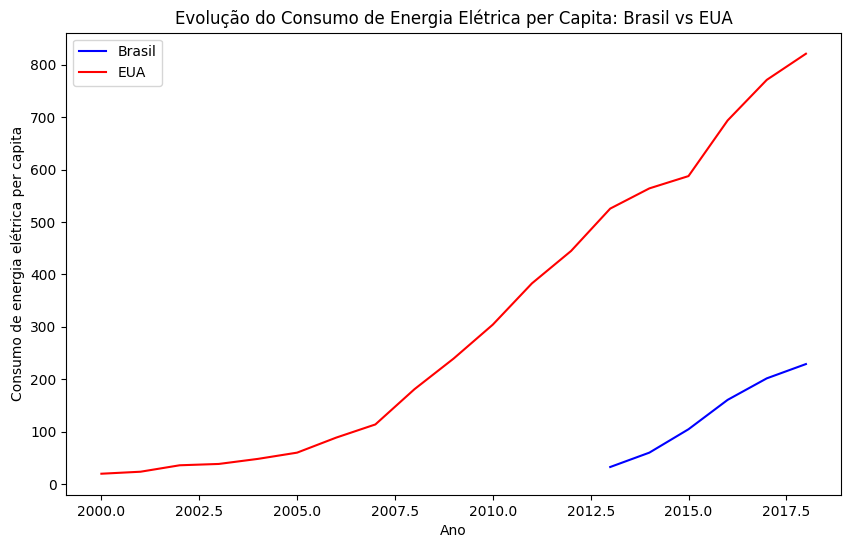

In [12]:
brazil_data = cleaned_data[cleaned_data['country'] == 'Brazil'][['year', 'wind_elec_per_capita']]
usa_data = cleaned_data[cleaned_data['country'] == 'United States'][['year', 'wind_elec_per_capita']]


print("Dados do Brasil (primeiras linhas):")
print(brazil_data.head())
print("\nDados dos EUA (primeiras linhas):")
print(usa_data.head())


if not brazil_data.empty and not usa_data.empty:
    plt.figure(figsize=(10, 6))

        
    plt.plot(brazil_data['year'], brazil_data['wind_elec_per_capita'], label='Brasil', color='blue')
        
        
    plt.plot(usa_data['year'], usa_data['wind_elec_per_capita'], label='EUA', color='red')

        
    plt.xlabel('Ano')
    plt.ylabel('Consumo de energia elétrica per capita')
    plt.title('Evolução do Consumo de Energia Elétrica per Capita: Brasil vs EUA')

        
    plt.legend()

       
    plt.show()
else:
    print("Erro: Não foi possível encontrar dados suficientes para Brasil ou EUA.")


Conclusão:

<p>Podemos ver que o brasil possui uma leve evolução do consumo de energia elétrica per capita após 2012 até um pouco depois de 2017, enquanto os Estados Unidos tiveram uma crescente muito maior desde 2000 ate hoje em dia</p>


Dados do Brasil (primeiras linhas):
      year  wind_share_energy
2966  2013              0.516
2967  2014              0.928
2968  2015              1.656
2969  2016              2.612
2970  2017              3.256

Dados da Argentina (primeiras linhas):
      year  wind_share_energy
1071  2011              0.008
1072  2012              0.107
1073  2013              0.126
1074  2014              0.171
1075  2015              0.160


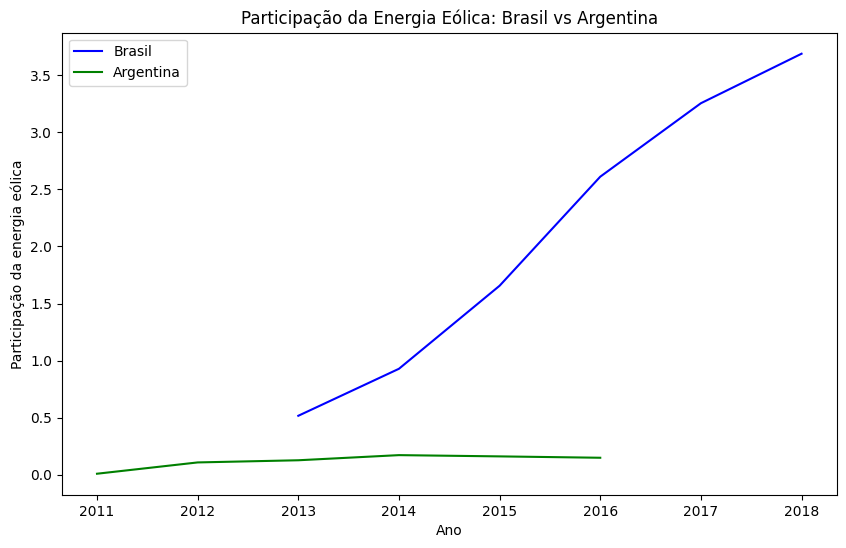

In [13]:
brazil_data = cleaned_data[cleaned_data['country'] == 'Brazil'][['year', 'wind_share_energy']]
argentina_data = cleaned_data[cleaned_data['country'] == 'Argentina'][['year', 'wind_share_energy']]
    
    
print("Dados do Brasil (primeiras linhas):")
print(brazil_data.head())
print("\nDados da Argentina (primeiras linhas):")
print(argentina_data.head())

    
if not brazil_data.empty and not argentina_data.empty:
    plt.figure(figsize=(10, 6))

        
    plt.plot(brazil_data['year'], brazil_data['wind_share_energy'], label='Brasil', color='blue')
        
        
    plt.plot(argentina_data['year'], argentina_data['wind_share_energy'], label='Argentina', color='green')

        
    plt.xlabel('Ano')
    plt.ylabel('Participação da energia eólica')
    plt.title('Participação da Energia Eólica: Brasil vs Argentina')

        
    plt.legend()

        
    plt.show()
else:
    print("Erro: Não foi possível encontrar dados suficientes para Brasil ou Argentina.")


Conclusão:

<p>O Brasil manteve uma crescente relativa de 2013 ate 2018, chegando até 3.5 de participação de energia eólica.</p>
<p>A argetina por outro lado não demostrou muita diferença, mantendo o niível de participação quase sempre o mesmo.</p>


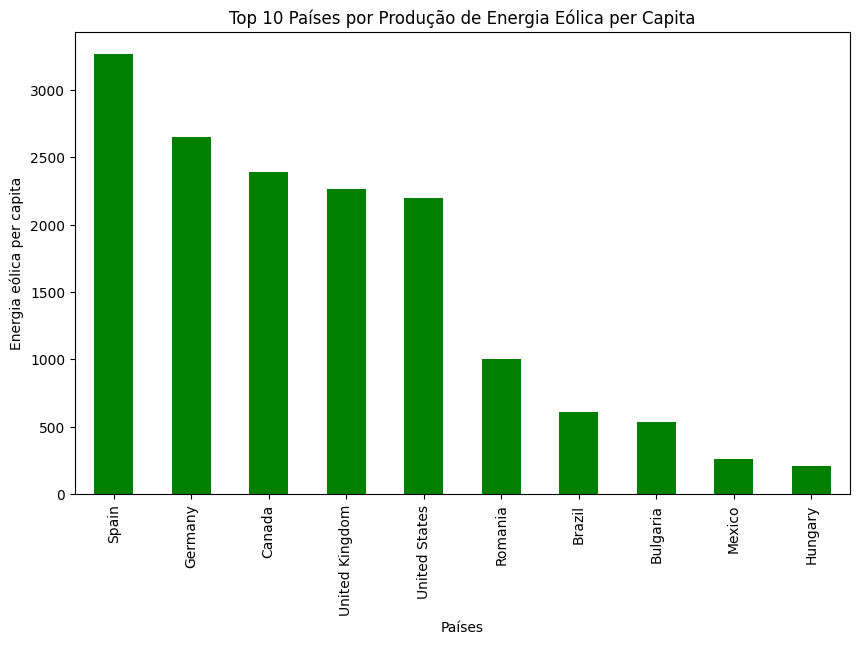

In [14]:
top_countries = cleaned_data[['country', 'wind_energy_per_capita']].groupby('country').max().sort_values(by='wind_energy_per_capita', ascending=False)
top_countries = top_countries.head(10)
    
plt.figure(figsize=(10, 6))
top_countries['wind_energy_per_capita'].plot(kind='bar', color='green')
plt.title('Top 10 Países por Produção de Energia Eólica per Capita')
plt.ylabel('Energia eólica per capita')
plt.xlabel('Países')
plt.show()

Conclusão:

<p>Os países que mais produzem energia eólica no mundo são Espanha, Alemanha e Canada, enquanto o brasil comparado com os outro se encontra apenas em sétimo lugar.</p>

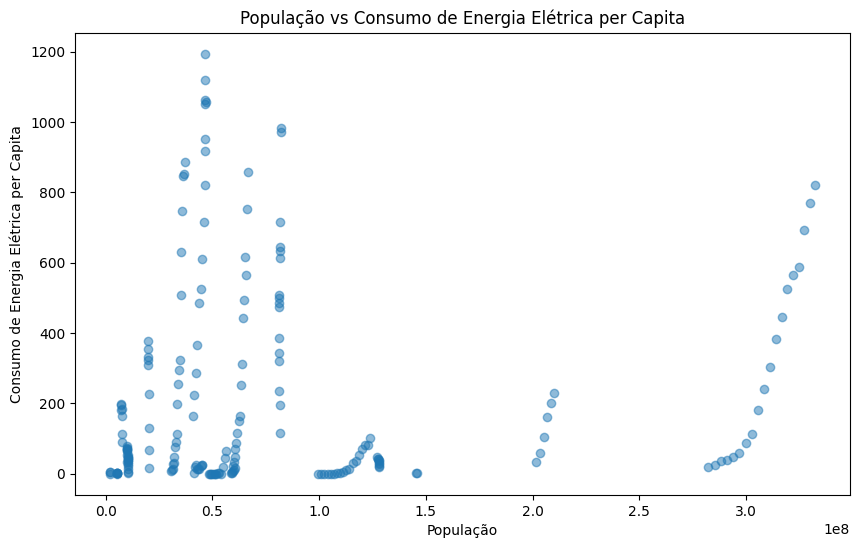

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['population'], cleaned_data['wind_elec_per_capita'], alpha=0.5)
plt.title('População vs Consumo de Energia Elétrica per Capita')
plt.xlabel('População')
plt.ylabel('Consumo de Energia Elétrica per Capita')
plt.show()

Conclusão:

<p>O gráfico não mostra uma clara tendência de que os países com mais população consumem mais energia elétrica,o que pode ser devido a outros fatores como a eficiência energética, a infraestrutura de energia disponível ou o uso de fontes renováveis </p>


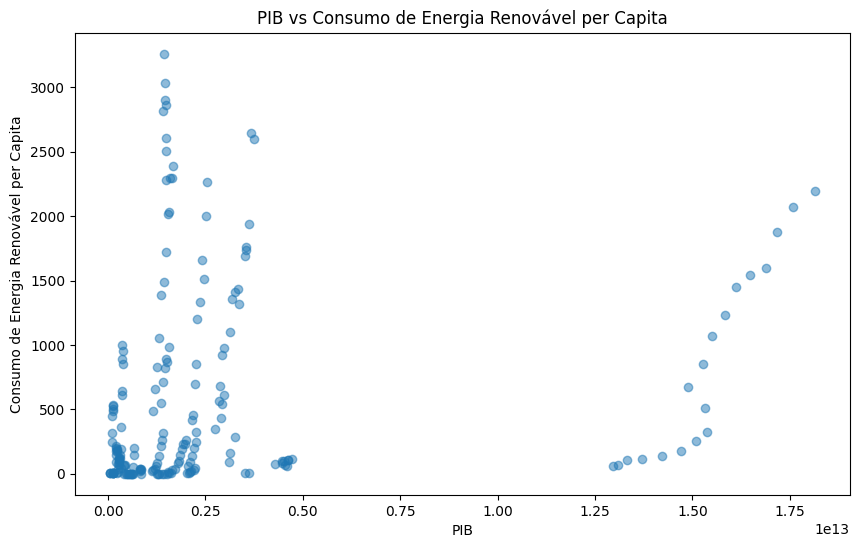

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['gdp'], cleaned_data['wind_energy_per_capita'], alpha=0.5)
plt.title('PIB vs Consumo de Energia Renovável per Capita')
plt.xlabel('PIB')
plt.ylabel('Consumo de Energia Renovável per Capita')
plt.show()

Conclusão:

<p>O gráfico mostra uma correlação negativa, onde os países mais ricos podem estar investindo em outras fontes de energia ou obtendo uma eficiência maior no uso de energia,o que resultaria em um consumo menor de energia eólica per capita, mesmo com um PIB mais alto.</p>


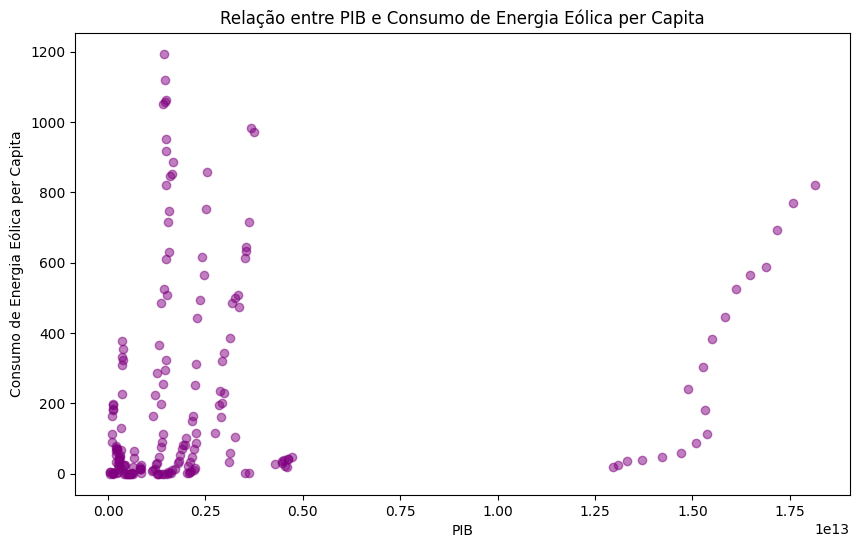

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['gdp'], cleaned_data['wind_elec_per_capita'], alpha=0.5, color='purple')
plt.title('Relação entre PIB e Consumo de Energia Eólica per Capita')
plt.xlabel('PIB')
plt.ylabel('Consumo de Energia Eólica per Capita')
plt.show()


Conclusão:

<p>Este é bem parecido com o gráfico acima onde conforme o pib aumenta menos consumo de energia eólica está sendo feito.</p>


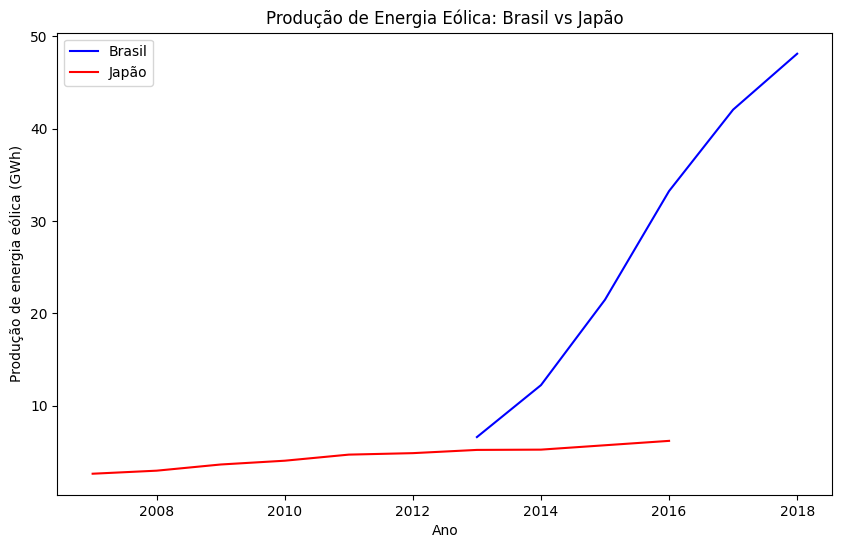

In [18]:

def plot_wind_electricity_brazil_vs_japan():
    # Comparando o Brasil com o Japão
    brazil_data = cleaned_data[cleaned_data['country'] == 'Brazil'][['year', 'wind_electricity']]
    japan_data = cleaned_data[cleaned_data['country'] == 'Japan'][['year', 'wind_electricity']]
    
    # Verifique se ambos os conjuntos de dados estão presentes
    if brazil_data.empty:
        print("Dados do Brasil não encontrados.")
    if japan_data.empty:
        print("Dados do Japão não encontrados.")
    
    # Se os dados existem, podemos gerar o gráfico
    if not brazil_data.empty and not japan_data.empty:
        plt.figure(figsize=(10, 6))

        # Plotando a linha do Brasil em azul
        plt.plot(brazil_data['year'], brazil_data['wind_electricity'], label='Brasil', color='blue')

        # Plotando a linha do Japão em vermelho
        plt.plot(japan_data['year'], japan_data['wind_electricity'], label='Japão', color='red')

        plt.xlabel('Ano')
        plt.ylabel('Produção de energia eólica (GWh)')
        plt.title('Produção de Energia Eólica: Brasil vs Japão')
        plt.legend()
        plt.show()
    else:
        print("Não é possível gerar o gráfico devido à falta de dados para uma das regiões.")

# Chamada da função
plot_wind_electricity_brazil_vs_japan()


Conclusão:

<p>Ao comparar a produção de energia eólica do Brasil com o Japão, podemos perceber que o Japão se manteve em um padrão de produção enquanto o Brasil entre 2012 e 2014 entrou em uma crescente na produção de energia eólica </p>


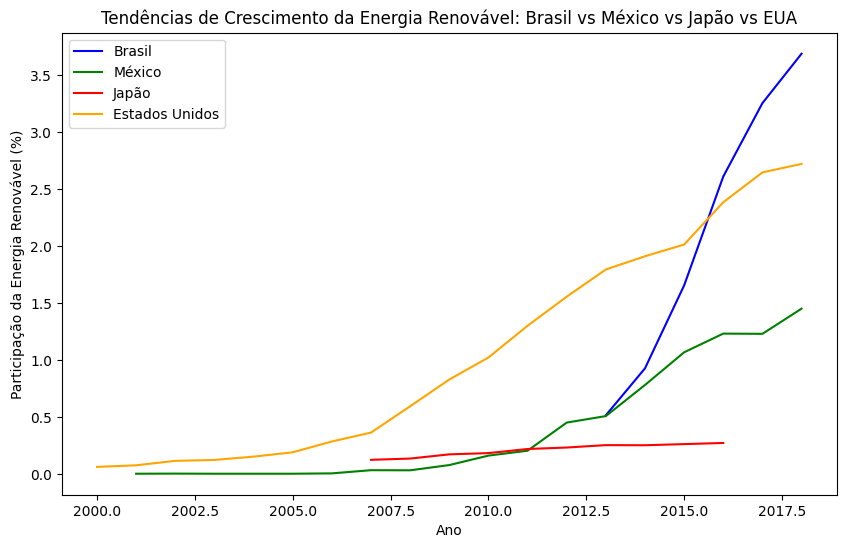

In [19]:
brazil_data = cleaned_data[cleaned_data['country'] == 'Brazil'][['year', 'wind_share_energy']]
mexico_data = cleaned_data[cleaned_data['country'] == 'Mexico'][['year', 'wind_share_energy']]
japan_data = cleaned_data[cleaned_data['country'] == 'Japan'][['year', 'wind_share_energy']]
usa_data = cleaned_data[cleaned_data['country'] == 'United States'][['year', 'wind_share_energy']]

if not brazil_data.empty and not mexico_data.empty and not japan_data.empty and not usa_data.empty:
    plt.figure(figsize=(10, 6))

    plt.plot(brazil_data['year'], brazil_data['wind_share_energy'], label='Brasil', color='blue')

    plt.plot(mexico_data['year'], mexico_data['wind_share_energy'], label='México', color='green')

    plt.plot(japan_data['year'], japan_data['wind_share_energy'], label='Japão', color='red')
        
    plt.plot(usa_data['year'], usa_data['wind_share_energy'], label='Estados Unidos', color='orange')

    plt.xlabel('Ano')
    plt.ylabel('Participação da Energia Renovável (%)')
    plt.title('Tendências de Crescimento da Energia Renovável: Brasil vs México vs Japão vs EUA')
    plt.legend()
    plt.show()
else:
    print("Não é possível gerar o gráfico devido à falta de dados para um ou mais países.")




Conclusão:

<p>O Brasil foi um dos países que tiveram a maior e mais rápida crescente, mesmo começando "tarde" em relação os outros.</p>
<p>Os Estados Unidos lideram com a maior crescente desde 2000, porém sem atingir o maior pico entre os países do gráfico, enquanto o japão mantpem um padrão e méxico possue um leve crescimento.</p>

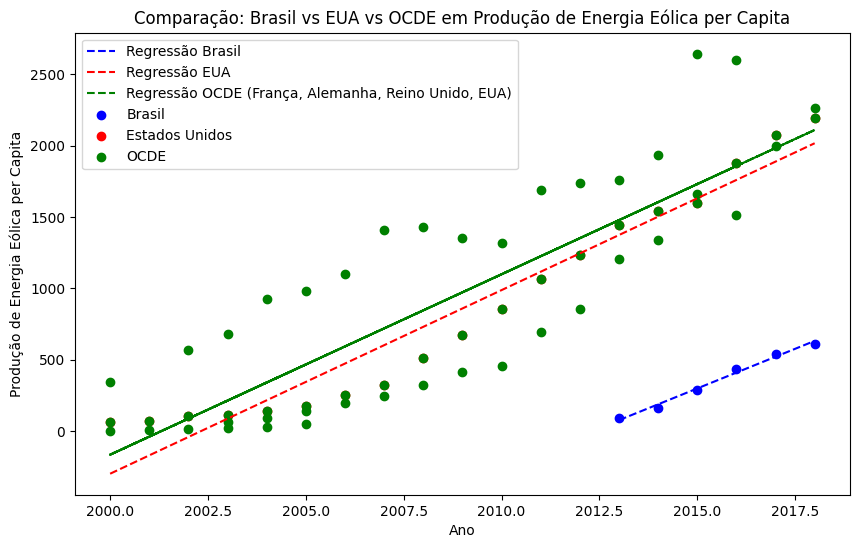

In [20]:
def plot_comparison_brazil_vs_oecd():
    # Verificando a disponibilidade dos dados para cada país
    oecd_data = cleaned_data[cleaned_data['country'].isin(['France', 'Germany', 'United Kingdom', 'United States'])][['year', 'wind_energy_per_capita']]
    brazil_data = cleaned_data[cleaned_data['country'] == 'Brazil'][['year', 'wind_energy_per_capita']]
    usa_data = cleaned_data[cleaned_data['country'] == 'United States'][['year', 'wind_energy_per_capita']]

    
    if oecd_data.empty:
        print("Dados da OCDE não encontrados. Utilizando países individuais da OCDE.")
    if brazil_data.empty:
        print("Dados do Brasil não encontrados.")
    if usa_data.empty:
        print("Dados dos Estados Unidos não encontrados.")
    
   
    def linear_regression(data):
        X = data['year'].values.reshape(-1, 1)
        y = data['wind_energy_per_capita'].values
        model = LinearRegression()
        model.fit(X, y)
        return model, X, y
    
   
    model_brazil, X_brazil, y_brazil = linear_regression(brazil_data)
    model_usa, X_usa, y_usa = linear_regression(usa_data)
    model_oecd, X_oecd, y_oecd = linear_regression(oecd_data)
    
    
    y_brazil_pred = model_brazil.predict(X_brazil)
    y_usa_pred = model_usa.predict(X_usa)
    y_oecd_pred = model_oecd.predict(X_oecd)
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(brazil_data['year'], y_brazil_pred, label='Regressão Brasil', color='blue', linestyle='--')
    plt.plot(usa_data['year'], y_usa_pred, label='Regressão EUA', color='red', linestyle='--')
    plt.plot(oecd_data['year'], y_oecd_pred, label='Regressão OCDE (França, Alemanha, Reino Unido, EUA)', color='green', linestyle='--')

    plt.scatter(brazil_data['year'], y_brazil, label='Brasil', color='blue')
    plt.scatter(usa_data['year'], y_usa, label='Estados Unidos', color='red')
    plt.scatter(oecd_data['year'], y_oecd, label='OCDE', color='green')
    
    plt.xlabel('Ano')
    plt.ylabel('Produção de Energia Eólica per Capita')
    plt.title('Comparação: Brasil vs EUA vs OCDE em Produção de Energia Eólica per Capita')
    plt.legend()
    plt.show()

plot_comparison_brazil_vs_oecd()


Conclusão:

<p>O gráfico ajuda a analisar e comparar a evolução do uso de energia eólica per capita entre Brasil, EUA E OCDE, onde o brasil apresente um evolução pequena em um brve período de tempo, enquanto os Estados Unidos e OCDE estão próximos, apesar dos países da OCDE mostrarem uma diversificação maior.</p>


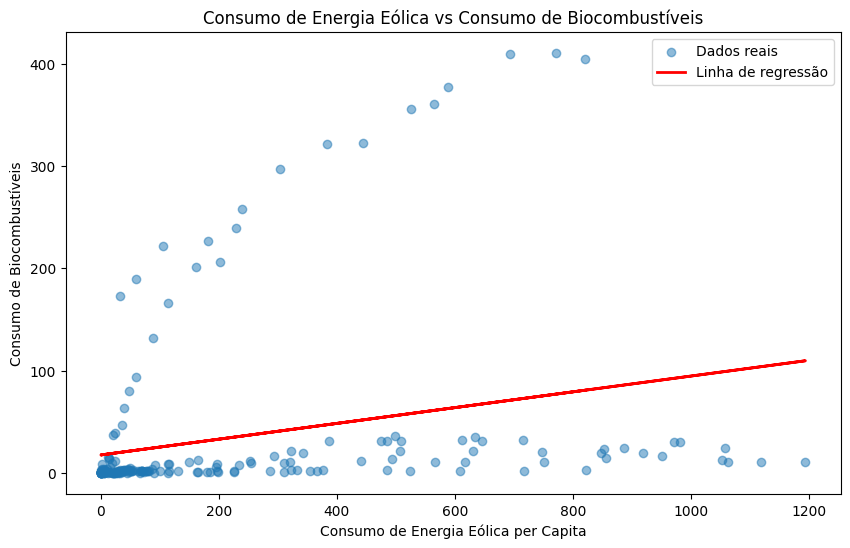

In [21]:
def plot_energy_vs_biofuel():
    # Selecionando dados para consumo de energia e consumo de biocombustíveis
    data = cleaned_data[['wind_elec_per_capita', 'biofuel_consumption']].dropna()
    
    # Regressão linear entre consumo de energia e consumo de biocombustíveis
    X = data['wind_elec_per_capita'].values.reshape(-1, 1)
    y = data['biofuel_consumption'].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Gerando predições da regressão
    y_pred = model.predict(X)
    
    # Plotando os dados e a linha de regressão
    plt.figure(figsize=(10, 6))
    plt.scatter(data['wind_elec_per_capita'], data['biofuel_consumption'], label='Dados reais', alpha=0.5)
    plt.plot(data['wind_elec_per_capita'], y_pred, color='red', label='Linha de regressão', linewidth=2)
    
    plt.title('Consumo de Energia Eólica vs Consumo de Biocombustíveis')
    plt.xlabel('Consumo de Energia Eólica per Capita')
    plt.ylabel('Consumo de Biocombustíveis')
    plt.legend()
    plt.show()

# Chamada da função
plot_energy_vs_biofuel()


Conclusão:

<p>A linha de regressão é crescente, indicando uma relação positiva entre o consumo de energia eólica per capita e o consumo de biocombustíveis</p>
<p>A concentração das bolinhas no início do gráfico pode sugerir que a maior parte dos países analisados ainda está em uma fase inicial de adoção de fontes renováveis.</p>
<p> Para países com maior consumo de energia eólica (valores maiores que 200), a dispersão maior das bolinhas pode indicar que, à medida que a energia eólica se torna mais disponível e utilizada, os países podem diversificar mais suas fontes de energia, incluindo o aumento do consumo de biocombustíveis. Ou seja, países com mais energia eólica podem não depender exclusivamente dessa fonte e podem estar usando outras fontes renováveis, como biocombustíveis, para atender à demanda energética</p>


# **Conclusão Final do Projeto**

O projeto trouxe uma visão melhor sobre  **pegada de carbono do Brasil** em comparação a outras regiões globais, utilizando tanto abordagens descritivas quanto preditivas. 

---

## **Principais Insights da Análise**
- A conexão entre o PIB e as emissões de carbono é perceptível, porém com uma intensidade moderada, refletindo os efeitos positivos de políticas ambientais e da transição para fontes de energia mais limpas.
- O brasil tem números médios quanto se trata de energia eólica, produzindo mais que a Argentina, pórem se saindo abaixo ao se compara com países mais desenvolvidos como Estados Unidos e Japão.

---

## **Resultados dos Modelos de Machine Learning**
- Os modelos de **Regressão Linear** demonstraram capacidade de prever a produção de energia eólica.
- Podemos também perceber com a ajuda da **Regressão Linear** quais as tendências sobre o consumo de energia eólica x consumo de biocombustíveis.
---

## **Conclusão Geral**

O estudo revela que o Brasil desempenha um papel crucial na diminuição dos impactos das mudanças climáticas, graças à sua matriz energética sustentável. No entanto, é fundamental continuar investindo em inovações tecnológicas e estratégias políticas para diminuir a dependência de combustíveis fósseis, especialmente no setor de transporte.

Por meio da combinação de análise de dados e métodos de Machine Learning, conseguimos entender cada vez melhor sobre as emissões de carbono e prever tendências futuras, auxiliando na tomada de decisões e como deixar o país cada vez mais sustentável
